# parsing configuration file

In [3]:
import configparser
confParser = configparser.ConfigParser()

In [4]:
#--- parse conf. file
confParser.read('configuration.ini')
print('conf. file sections:',confParser.sections())

#--- set dynamic parameters
temp=confParser['parameters']['temperature']

#--- edit list of input files
confParser.set('input files','dump file',''.join([
               'allconf ', #0
              ]))
confParser.set('input files','diffusion file',''.join([
               'Diffusion.dat ', #0
              ]))


conf. file sections: ['parameters', 'flags', 'input files', 'Atomic Radius']


# import libraries

In [5]:
import sys
sys.path.append(confParser['input files']['lib_path'])

#--- system libraries
import pdb
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import traceback
import os
import scipy.interpolate as scp_int
import warnings
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import patches
import sys
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import patsy
from sklearn import linear_model, mixture
import sklearn.mixture as skm
from scipy import optimize
import scipy
import re
from functools import reduce
import time
import fnmatch
from scipy.optimize import curve_fit
#
warnings.filterwarnings('ignore')

#--- user modules
import LammpsPostProcess as lp
import LammpsPostProcess2nd as lpp
import utilityy as utll
import utility as utl
from utility import *
import imp
imp.reload(lp)
imp.reload(lpp)
imp.reload(utl)
imp.reload(utll)

<module 'utilityy' from '/Users/Home/Desktop/Tmp/txt/git/vacancyDiffusion/postproc/../../HeaDef/postprocess/utilityy.py'>

In [6]:
class Symbols:
    def __init__(self):
        self.colors = ['black','red','green','blue','cyan','brown','grey','magenta','orange','yellow']
        self.fillstyles=['white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None]
        self.markers=['o','s','D','^','<','>','v']
        self.markersizes=[10,10,10,12,12,12,10]
        self.nmax=7
        
    def GetAttrs(self,count=0,label='',nevery=1,fmt='.-',zorder=1):
        if count > self.nmax:
            print('index out of list bound!')
            return 
        attrs={ 'color':self.colors[count],
            'markersize':self.markersizes[count],
            'marker':self.markers[count],
            'markerfacecolor':self.colors[count],
            'markeredgecolor':'white', #'black' if not self.fillstyles[count] else None,
            'label':label,
           'markevery':nevery,
           'errorevery':nevery,
           'markeredgewidth':1.75,
            'linewidth':1, 
           'barsabove':None,
           'capsize':5,
           'capthick':1,
           'elinewidth':1,
           'fmt':fmt,
             'zorder':zorder,
         }
        return attrs
    
    def GetAttrs2nd(self,count=0,label='',nevery=1,fmt='.-',zorder=1):
        if count > self.nmax:
            print('index out of list bound!')
            return 
        attrs={ 'color':self.colors[count],
            'markersize':self.markersizes[count],
            'marker':self.markers[count],
            'markerfacecolor':'white',
#            'markeredgecolor':'black' if not self.fillstyles[count] else None,
            'label':label,
           'markevery':nevery,
           'errorevery':nevery,
           'markeredgewidth':1.75,
            'linewidth':1, 
           'barsabove':None,
           'capsize':5,
           'capthick':1,
           'elinewidth':1,
           'fmt':fmt,
            'zorder':zorder,
          }
        return attrs

class Legends:
    def __init__(self
                ):
        pass
    def Set(self,fontsize=20,
                 labelspacing=0,
                 **kwargs
#                 bbox_to_anchor=(0.5,0.48,0.5,0.5),
           ):
        self.attrs = {'frameon':False,'fontsize':fontsize,
                   'labelspacing':labelspacing,
                      'handletextpad':.2,
                   'handlelength':1,
                    **kwargs,
                     }
    def Get(self):
        return self.attrs

DRAW_FRAME=(0.23,0.08,0.12,0.07,0.01)
if not eval(confParser['flags']['RemoteMachine']):
    matplotlib.rcParams['text.usetex'] = True #--- comment tex stuff!
    


# Dump File

In [6]:
!rm -r dumpFile;mkdir dumpFile

#--- fetch parameters
path = confParser['input files']['input_path']
indx = confParser['input files']['fileIndex']
dumpFile = '%s/%s'%(path,confParser['input files']['dump file'].split()[int(indx)])
datFile = '%s/%s'%(path,confParser['input files']['diffusion file'].split()[int(indx)])
lib_path = confParser['input files']['lib_path']
outpt = 'dumpFile/dump.xyz'
outpt_headers = 'dumpFile/calcResults.txt'

#--- parse dump: call ovito
t0=time.time()
!ovitos $lib_path/OvitosCna.py $dumpFile $outpt 1 7 $outpt_headers
print('output dump file=%s s'%(time.time()-t0))


#--- parse dump files
print('parsing %s'%(outpt))
lmpData = lp.ReadDumpFile( '%s'%(outpt) ) 
lmpData.GetCords( ncount = sys.maxsize, 
                )
print('time steps:',lmpData.coord_atoms_broken.keys())
display(lmpData.coord_atoms_broken[0].head())

#--- add timescales
lmpData.times = np.loadtxt(datFile)[:,0]

#--- parse headers
lmpData.headers = pd.DataFrame(np.loadtxt(outpt_headers),columns=["Barrier", "Energy", "Step", "Time"])

#--- common neighbor analysis
dumpFile = 'dumpFile/dump.xyz'
outpt = 'dumpFile/neighbors.xyz'
t0=time.time()
!ovitos $lib_path/OvitosCna.py $dumpFile $outpt 1 0
print('output dump file=%s s'%(time.time()-t0))

#--- parse dump files
print('parsing %s'%(outpt))
lmpCna = lp.ReadDumpFile( '%s'%(outpt) ) 
lmpCna.GetCords( ncount = sys.maxsize, 
                )
print('time steps:',lmpCna.coord_atoms_broken.keys())
display(lmpCna.coord_atoms_broken[0].head())


InputFile= ../simulations/CantorNatom16KTemp1000KEnsemble8/Run0/allconf
num_frames= 49
frame=0
frame=1
frame=2
frame=3
frame=4
frame=5
frame=6
frame=7
frame=8
frame=9
frame=10
frame=11
frame=12
frame=13
frame=14
frame=15
frame=16
frame=17
frame=18
frame=19
frame=20
frame=21
frame=22
frame=23
frame=24
frame=25
frame=26
frame=27
frame=28
frame=29
frame=30
frame=31
frame=32
frame=33
frame=34
frame=35
frame=36
frame=37
frame=38
frame=39
frame=40
frame=41
frame=42
frame=43
frame=44
frame=45
frame=46
frame=47
frame=48
output dump file=6.178586959838867 s
parsing dumpFile/dump.xyz
reached end of file!
time steps: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])


,id,type,x,y,z
0,1,4,14.257409,5.364226,12.519177
1,2,3,19.689968,35.838047,37.701435
2,3,2,5.313060,30.449585,25.174215
3,4,2,19.840660,46.732754,16.041273
4,5,3,52.073833,37.667217,35.884407


InputFile= dumpFile/dump.xyz
num_frames= 49
frame=0
frame=1
frame=2
frame=3
frame=4
frame=5
frame=6
frame=7
frame=8
frame=9
frame=10
frame=11
frame=12
frame=13
frame=14
frame=15
frame=16
frame=17
frame=18
frame=19
frame=20
frame=21
frame=22
frame=23
frame=24
frame=25
frame=26
frame=27
frame=28
frame=29
frame=30
frame=31
frame=32
frame=33
frame=34
frame=35
frame=36
frame=37
frame=38
frame=39
frame=40
frame=41
frame=42
frame=43
frame=44
frame=45
frame=46
frame=47
frame=48
output dump file=6.749431133270264 s
parsing dumpFile/neighbors.xyz
reached end of file!
time steps: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])


,id,type,x,y,z,StructureType
0,1,4,14.257410,5.364226,12.519177,1.0
1,2,3,19.689968,35.838047,37.701435,1.0
2,3,2,5.313060,30.449583,25.174215,1.0
3,4,2,19.840660,46.732754,16.041273,1.0
4,5,3,52.073833,37.667217,35.884407,1.0


In [7]:
def AddRndStrs(df):
    df['sxx']=np.random.normal(size=len(df))
    df['syy']=np.random.normal(size=len(df))
    df['szz']=np.random.normal(size=len(df))

#--- add random stress
#list( map(lambda x:AddRndStrs(lmpData.coord_atoms_broken[x]),lmpData.coord_atoms_broken.keys()) )


# Displacements

In [8]:
def WrapperDisp(lmpData,reference_frames,current_frames):
    '''
    invoke disp analysis in ovito
    '''
    #--- split dump file
    for ii0, ii in zip(reference_frames,current_frames):
        atom_current = lp.Atoms(**lmpData.coord_atoms_broken[ii])
        atom_reference = lp.Atoms(**lmpData.coord_atoms_broken[ii0])
        box  = lp.Box( BoxBounds = lmpData.BoxBounds[ii],  AddMissing = np.array([0.0,0.0,0.0] ))
        box0 = lp.Box( BoxBounds = lmpData.BoxBounds[ii0], AddMissing = np.array([0.0,0.0,0.0] ))
        lpp.WriteDumpFile(atom_current, box).Write('disp/dump_curr.xyz', itime = ii,
                 attrs=['id', 'type','x', 'y', 'z'],
                 fmt='%i %i %15.14e %15.14e %15.14e')
        lpp.WriteDumpFile(atom_reference, box0).Write('disp/dump_ref.xyz', itime=ii0,
                 attrs=['id', 'type','x', 'y', 'z'],
                 fmt='%i %i %15.14e %15.14e %15.14e')
    #    os.system('tar czf dump.gz dump.xyz')
        fileCurr = 'disp/dump_curr.xyz'
        fileRef = 'disp/dump_ref.xyz'
        output = 'disp/disp.%s.xyz'%ii
        #--- load to ovito
        os.system('ovitos %s/OvitosCna.py %s %s 2 8 %s'%(lib_path,fileCurr,output,fileRef))
        #--- concat
        os.system('cat %s >> disp/disp.xyz;rm %s'%(output,output))
        
        
        

!mkdir disp

#--- fetch parameters
lib_path = confParser['input files']['lib_path']
outpt = 'disp/disp.xyz'
!rm $outpt

current_frames = np.array(list(lmpData.coord_atoms_broken.keys()))[::2] #--- ignore half steps
current_frames.sort()
print('current_frames=',current_frames)
#--- reference
reference_frames = [current_frames[0]]*len(current_frames)
print('reference_frames=',reference_frames)
    
    
#--- call ovito
WrapperDisp(lmpData,reference_frames,current_frames)


#--- parse dump files
print('parsing %s'%(outpt))
lmpDisp = lp.ReadDumpFile( 'disp/disp.xyz' )
lmpDisp.GetCords( ncount = sys.maxsize )
display(lmpDisp.coord_atoms_broken[0].head())


mkdir: disp: File exists
current_frames= [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48]
reference_frames= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFi

,id,type,x,y,z,DisplacementX,DisplacementY,DisplacementZ
0,1,4,14.257409,5.364226,12.519177,0.0,0.0,0.0
1,2,3,19.689968,35.838047,37.701435,0.0,0.0,0.0
2,3,2,5.313060,30.449585,25.174215,0.0,0.0,0.0
3,4,2,19.840660,46.732754,16.041273,0.0,0.0,0.0
4,5,3,52.073833,37.667217,35.884407,0.0,0.0,0.0


In [9]:
#--- refframe = current_frame - 1
#--- reference
!rm -r disp;mkdir disp
print('current_frames=',current_frames)
reference_frames = np.concatenate([[0],current_frames[:-1]])
print('reference_frames=',reference_frames)
    
    
#--- call ovito
WrapperDisp(lmpData,reference_frames,current_frames)


#--- parse velocity
print('parsing %s'%(outpt))
lmpVel = lp.ReadDumpFile( 'disp/disp.xyz' )
lmpVel.GetCords( ncount = sys.maxsize )
display(lmpVel.coord_atoms_broken[0].head())


current_frames= [ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48]
reference_frames= [ 0  0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44
 46]
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz


,id,type,x,y,z,DisplacementX,DisplacementY,DisplacementZ
0,1,4,14.257409,5.364226,12.519177,0.0,0.0,0.0
1,2,3,19.689968,35.838047,37.701435,0.0,0.0,0.0
2,3,2,5.313060,30.449585,25.174215,0.0,0.0,0.0
3,4,2,19.840660,46.732754,16.041273,0.0,0.0,0.0
4,5,3,52.073833,37.667217,35.884407,0.0,0.0,0.0


In [10]:
# def unwrapped(key0,key1):
#     times = list(lmpDisp.coord_atoms_broken.keys())
#     times.sort()
#     x = np.concatenate([list(map(lambda x:lmpVel.coord_atoms_broken[x][key0],times))],axis=0).T
#     x=x.cumsum(axis=1)
#     x= (x.T + np.array(lmpVel.coord_atoms_broken[0][key1])).T
#     return x

# x=unwrapped('DisplacementX','x')
# y=unwrapped('DisplacementY','y')
# z=unwrapped('DisplacementZ','z')

# times = list(lmpDisp.coord_atoms_broken.keys())
# times.sort()
# count=0
# #xsum_concat=np.array([0,0,0])
# for itime in times:
#     filtr = lmpCna.coord_atoms_broken[itime]['StructureType'] == 0.0
#     xsum = np.array([x[:,itime][filtr].mean(), y[:,itime][filtr].mean(), z[:,itime][filtr].mean()])
#     xsum_concat = xsum.copy() if itime == 0 else np.c_[xsum_concat,xsum]
#     count += 1
# xsum_concat = xsum_concat.T
# xsum_concat

# !rm void.xyz
# for itime in range(xsum_concat.shape[0]):
#     sfile=open('void.xyz','a')
#     utl.PrintOvito(pd.DataFrame(np.c_[xsum_concat[itime,:]].reshape(1,3),columns=['x','y','z']), 
#                    sfile, 'itime=%s'%itime, attr_list=['x', 'y', 'z'])

## msd vs. time

mkdir: msd: File exists


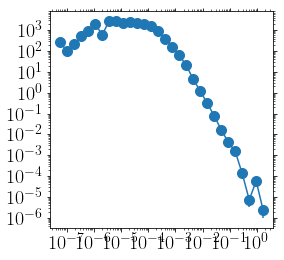

In [11]:
class MsDisp:
    
    def __init__(self, lmpDisp, lmpVel, lmpCna, filtr):
        '''
        returns mean-squared displacements
        '''
        self.disp = lmpDisp.coord_atoms_broken
        self.veloc = lmpVel.coord_atoms_broken
        self.cna = lmpCna.coord_atoms_broken
        
        self.times = list(lmpDisp.coord_atoms_broken.keys())
        self.times.sort()
        
        self.filtr=filtr
    def Get(self,LOG=False):
        '''
        returns msd (no temporal window)
        '''
        if not LOG: #---  mean
            msd = list(map(lambda x:(self.disp[x]['DisplacementX']**2+\
                         self.disp[x]['DisplacementY']**2+\
                         self.disp[x]['DisplacementZ']**2).mean(),
                    self.times))
        else: #--- geometric mean
            msd = list(map(lambda x:10**((np.log10(self.disp[x]['DisplacementX']**2+\
                         self.disp[x]['DisplacementY']**2+\
                         self.disp[x]['DisplacementZ']**2)).mean()),
                    self.times))
        return np.array(msd)
        
    def GetPdfJumps(self):
        '''
        pdf's of jumps
        '''
        for itime in self.times:
            df=self.veloc[itime]
            if itime == 0:
                df_concat = np.c_[df[['DisplacementX','DisplacementY','DisplacementZ']]]
            else:
                df_concat = np.concatenate([df_concat,df[['DisplacementX','DisplacementY','DisplacementZ']]],axis=0) 
        df_abs = np.abs(df_concat.flatten())
        filtr = df_abs > 0.0
        
        hist, bin_edges, err = utl.GetPDF(df_abs[filtr],n_per_decade=4)
        utl.PltErr(bin_edges,hist, yerr=err,
                  yscale='log',
                   xscale='log',
        #           ylim=(1e-6,1e4)
                  )
        #
        with open('msd/event_jumps.txt','w') as fp:
            np.savetxt(fp,np.c_[bin_edges,hist,err],header='bin_edges hist err')

        
    def WindowAverage(self,ttime,bins_per_decade=4,LOG=False):
        '''
        returnd msd (include temporal windows)
        '''
        for shift in range(1,len(self.times)-1):
    #        shift = 1 #--- time index  shift
            dt = zip(self.times,self.times[shift:]) #--- time tuples
            dt_real = list(map(lambda x: x[1]-x[0], zip(ttime,ttime[shift:]))) #--- real time difference
            if not LOG: #---  mean
                disp = list(map(lambda x: ((self.disp[x[1]]['DisplacementX'][self.filtr]-self.disp[x[0]]['DisplacementX'][self.filtr])**2+\
                              (self.disp[x[1]]['DisplacementY'][self.filtr]-self.disp[x[0]]['DisplacementY'][self.filtr])**2+\
                              (self.disp[x[1]]['DisplacementZ'][self.filtr]-self.disp[x[0]]['DisplacementZ'][self.filtr])**2).mean(),
                    zip(self.times,self.times[shift:])))
            else:
                disp = list(map(lambda x: 10**((np.log10((self.disp[x[1]]['DisplacementX'][self.filtr]-self.disp[x[0]]['DisplacementX'][self.filtr])**2+\
                              (self.disp[x[1]]['DisplacementY'][self.filtr]-self.disp[x[0]]['DisplacementY'][self.filtr])**2+\
                              (self.disp[x[1]]['DisplacementZ'][self.filtr]-self.disp[x[0]]['DisplacementZ'][self.filtr])**2)).mean()),
                    zip(self.times,self.times[shift:])))
            
#            print(np.array(disp).shape)
            if shift == 1:
                tr_mat=np.c_[dt_real,disp]
            else:    
                tr_mat = np.concatenate([tr_mat,np.c_[dt_real,disp]],axis=0)
                
        #--- remove dt == 0
        filtr = tr_mat[:,0] > 0
        tr_mat = tr_mat[filtr]
        
#        pdb.set_trace()
        #--- binning
        xmin = 0.99*tr_mat[:,0].min()
        xmax = 1.01*tr_mat[:,0].max()
        n_decades = int(np.ceil(np.log10(xmax/xmin)))
        bins = np.logspace(np.log10(xmin),np.log10(xmax),n_decades*bins_per_decade)
        #
        ysum, edges = np.histogram(tr_mat[:,0],bins=bins,weights=tr_mat[:,1])
        ysum_sq, edges = np.histogram(tr_mat[:,0],bins=bins,weights=tr_mat[:,1]*tr_mat[:,1])
        xsum, edges = np.histogram(tr_mat[:,0],bins=bins,weights=tr_mat[:,0])
        count, edges = np.histogram(tr_mat[:,0],bins=bins)
        #
        filtr = count > 1
        ysum = ysum[filtr]
        ysum_sq = ysum_sq[filtr]
        xsum = xsum[filtr]
        count = count[filtr]
        assert not np.any(count == 0), 'incerease bin size!'
        #
        ysum_sq /= count
        ysum /= count
        xsum /= count
        ysum_sq -= (ysum * ysum)
#        assert not np.any(ysum_sq < 0.0), 'print %s'%ysum_sq
        
        return np.c_[xsum,ysum,(ysum_sq/count)**0.5]
    
    def VacancyDynamics(self, title='void.xyz'):
        '''
        return xyz coordinates associated with vacancy 
        '''
        #--- unwrapped coordinates
        times = self.times[1:]
        xsum_concat=np.array([0,0,0])
        for itime in times:
            filtr = self.cna[itime-1]['StructureType'] == 0.0 #--- neighboring atoms
            xsum = -np.array(self.veloc[itime][filtr] #--- disp
                            [['DisplacementX','DisplacementY','DisplacementZ']].sum())
            xsum_concat = np.c_[xsum_concat,xsum]
        xsum_concat = xsum_concat.T
        xv = xsum_concat.cumsum(axis=0) #--- integrate
#        utl.PltErr(xv[:,0],xv[:,1])
        #--- add initial position
        itime=0
        filtr = self.cna[itime]['StructureType'] == 0.0
        rc = np.array(self.veloc[itime][filtr]
                        [['x','y','z']].mean())
        #--- print
        try:
            os.system('rm msd/%s'%title)
        except:
            pass
        for itime in range(xv.shape[0]):
            sfile=open('msd/%s'%title,'a')
            utl.PrintOvito(pd.DataFrame(np.c_[xv[itime,:]+rc].reshape(1,3),columns=['x','y','z']), 
                       sfile, 'itime=%s'%itime, attr_list=['x', 'y', 'z'])
            
        self.xv = xv
        self.dxv = xsum_concat
    

!mkdir msd
msd = MsDisp( lmpDisp, lmpVel, lmpCna,
              np.ones(lmpDisp.coord_atoms_broken[0].shape[0],dtype=bool) #--- filter 
            )
#
msd.GetPdfJumps() #--- jump distributions
#--- vacancy
msd.VacancyDynamics(title='void4.xyz')
#
ans = msd.WindowAverage(lmpData.headers['Time'][::2],bins_per_decade=4,LOG=False) #---msd
ans_logAveraged = msd.WindowAverage(lmpData.headers['Time'][::2],bins_per_decade=4,LOG=True)
#
#
with open('msd/msd.txt','w') as fp:
    np.savetxt(fp,ans,header='t\tmsd\terr')
#
with open('msd/msd_logAveraged.txt','w') as fp:
    np.savetxt(fp,ans_logAveraged,header='t\tmsd\terr')
#
with open('msd/event_times.txt','w') as fp:
    np.savetxt(fp,lmpData.times,header='t')
#
with open('msd/timeseries.txt','w') as fp:
    np.savetxt(fp,np.c_[lmpData.headers],header='Barrier Energy Step Time')
    
#--- filter based on atom types
# types = list(set(lmpDisp.coord_atoms_broken[0]['type']))
# for itype in types:
#     filtr = lmpDisp.coord_atoms_broken[0]['type'] == itype
#     msd = MsDisp( lmpDisp, lmpVel,
#               filtr #--- filter 
#             )
#     ans = msd.WindowAverage(lmpData.times,bins_per_decade=4)
#     #--- print
#     with open('msd/msd_type%s.txt'%itype,'w') as fp:
#         np.savetxt(fp,ans,header='t\tmsd\terr')
#     with open('msd/event_times_type%s.txt'%itype,'w') as fp:
#         np.savetxt(fp,lmpData.times,header='t')



## Energy barriers

In [132]:
class EnergyBarrier:
    '''
    return energy barriers corresponding to diffusional hopping
    '''
    def __init__(self,events_directory,evlist_directory,lmpData):
        self.events_dir = events_directory
        self.evlist_dir = evlist_directory
        self.lmpData = lmpData.coord_atoms_broken[0]
        
    def Parse(self):
        '''
        parse event files
        '''
        self.events_id_energy = self.ParseEvents_dir()
        self.catalog = self.ParseEvList_dir()
        
        
    def ParseEvents_dir(self):
        files = os.listdir(self.events_dir)
        d=[]
        for sfile in files:
            if not '.xyz' in sfile: #--- skip .xyz files 
                try:
                    filee=open('%s/%s'%(self.events_dir,sfile)) #--- open file
                    xstrs = filee.readlines()
                    event_id = int(xstrs[0].split()[-1]) #--- event id
                    barrier = float(xstrs[2].split()[-1]) #--- energy
                    ncluster =  int(xstrs[15].split()[-1])                 
                    shape_cluster_atoms =  int(xstrs[16].split()[-1])
                    atom_id = int(xstrs[17+ncluster].split()[0])
                    #print(atom_id)
                    d = np.c_[event_id,atom_id,barrier] if len(d) == 0 else\
                    np.concatenate([d,np.c_[event_id,atom_id,barrier]])
#                    d.setdefault(event_id,[]).append(barrier) #--- store
                except:
        #            traceback.print_exc()
                    continue
            
        #--- extract types
        df=self.lmpData
        atom_ids = d[:,1]
        types = utl.FilterDataFrame(df, 
                    key='id', 
                    val=atom_ids
                   )['type']

        return pd.DataFrame(np.c_[types,d],columns=['atom_type','event_id','atom_id','barrier'])

    def ParseEvList_dir(self):
        files = os.listdir(self.evlist_dir)
        events={}
        for sfile in files:
            try:
                kmc_step = int(sfile.split('_')[-1])
        #        print(kmc_step)
                filee=open('%s/%s'%(self.evlist_dir,sfile)) #--- open file
                events[kmc_step] = pd.read_csv(filee,delim_whitespace=True).iloc[1:]#delimiter='')
            except:
                continue
        return events
        
    def SplitByType(self):
        '''
        return energies (parsed from catalogs) slipt by atom types
        '''
        kmc_steps = list(self.catalog.keys())
        kmc_steps.sort()


        #--- dict based on types
        df_concat = {}
        types = list(set(self.lmpData.type))
        for itype in types:
            df_concat[str(itype)] = {}

        for kmc_step in kmc_steps: #--- kmc loop
            df = self.catalog[kmc_step]
            sdict=df.groupby(by='#TypeId').groups #--- group by type
            for itype in sdict:
                indices = sdict[itype] #--- row index: atoms with  '#TypeId' == itype
                cond = len(df_concat[itype]) == 0 #--- empty key?
                df_concat[itype] = np.c_[df.loc[indices]] if cond else\
                np.concatenate([df_concat[itype],np.c_[df.loc[indices]]],axis=0)

        self.energyByType = {}
        for itype in df_concat:
             self.energyByType[ itype ] = pd.DataFrame(df_concat[itype],columns=list(df.keys()))        

eb = EnergyBarrier('%s/EVENTS_DIR'%confParser['input files']['input_path'],
                   '%s/EVLIST_DIR'%confParser['input files']['input_path'],
                   lmpData
                  
                  )
eb.Parse()
eb.SplitByType()

#eb.events_id_energy extract from Events_dir
#self.energyByType extract from catalogs

#--- write to file
with open('msd/eventID_barrier.txt','w') as fp:
    np.savetxt(fp,
               np.c_[eb.events_id_energy],
               header='atom_type event_id atom_id barrier')

#--- write to file: energy from catalogs
for itype in eb.energyByType.keys():
    with open('msd/eventID_barrier_catalog_type%s.txt'%itype,'w') as fp:
    #--- concat different types
        sarr = np.c_[eb.energyByType[itype][['AtomId','eventId','barrier']]].astype(float)
        np.savetxt(fp,
                   sarr,
                   header='AtomId eventId barrier'
                  )


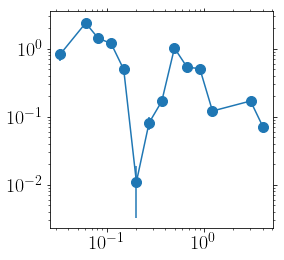

<AxesSubplot:>

In [186]:
# sarr = np.concatenate(list(d.values()))
# hist,edges,err=utl.GetPDF(sarr,n_per_decade=8)
# utl.PltErr(edges,hist,yerr=err,xscale='log',yscale='log')

In [56]:
#--- assert events in catalogs are included in event dir


    #    Energy_type[int(keys)] = np.c_[df.loc[indices]]
    #    Energy_type[int(keys)].setdefault()
    # for kmc_step in kmc_steps:
    #     print(kmc_step)
    #     trueFalse = list(map(lambda x: int(x) in eb.events_id_energy.keys() ,eb.catalog[kmc_step]['eventId']))
    #     assert np.all(trueFalse),'modes %s are missing!'%(list(eb.catalog[kmc_step]['eventId'][~np.array(trueFalse)]))


,#TypeId,AtomId,IniTopoId,SadTopoId,FinTopoId,eventId,Spec_id,barrier,inv_bar,asy_ener,true_rate,inisad_dr,inifin_dr,refined
0,5,2393,494482,836035,1117672,257601,1,0.432773,0.457353,-0.024580,6.591E+10,1.179560,2.376447,T
1,5,2393,1117672,836035,494482,654408,1,0.457353,0.432773,0.024580,4.955E+10,1.412782,2.376438,T
2,5,5600,694851,235776,1050328,586203,1,0.429146,0.219418,0.209728,6.874E+10,1.463610,2.522797,T
3,5,5600,694851,599535,1070247,371347,2,4.359005,4.300219,0.058786,1.075E-09,3.202557,3.532723,F
4,5,563,1116534,64772,706145,376653,1,0.720279,0.609493,0.110785,2.344E+09,1.632833,2.889446,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,5,12714,1169639,202454,938706,1179411,1,0.076522,0.140759,-0.064236,4.115E+12,1.187282,2.159284,T
645,5,1918,189001,1116341,268404,1011865,1,0.101771,0.102995,-0.001224,3.070E+12,0.764004,1.303535,T
646,5,5321,558123,292208,827459,595979,1,0.718832,0.694949,0.023884,2.384E+09,1.982071,3.124778,T
647,5,12714,938706,202454,1169639,730085,1,0.140759,0.076522,0.064236,1.953E+12,1.253237,2.159295,T


In [176]:
#--- plot energy per atom
# d={}
# for kmc_step in kmc_steps:
#     for items in np.c_[eb.catalog[kmc_step][['AtomId','barrier']]]:
#         d.setdefault(int(items[0]),[]).append(float(items[1]))

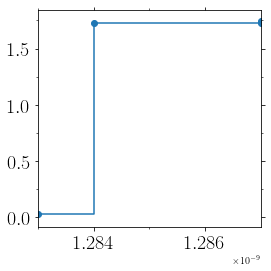

<AxesSubplot:>

In [274]:
# itime=90
# #filtr = msd.cna[itime].StructureType==0.0
# filtr=msd.veloc[itime].DisplacementX.abs() > 0.1
# assert np.any(filtr)
# idd = msd.veloc[itime][filtr].id.iloc[0]
# #msd.veloc[itime][filtr]

# times=list(msd.disp.keys())
# times.sort()
# #idd=10
# dispx={}
# itimec=itime
# for itime in times:
#     filtr= msd.disp[itime].id==idd
#     dispx[itime]=msd.disp[itime].DisplacementX[filtr]
# tt=lmpData.headers.Time.iloc[0::2]
# utl.PltErr(tt,
#            list(map(lambda x:dispx[x],times[0::2])),
# #           attrs={'fmt':'.'},
#            xlim=(tt[itimec-2],tt[itimec+2]),
#            attrs={'marker':'o',
#                   'markersize':6,
#                   'drawstyle':'steps-post'}
           
#           )

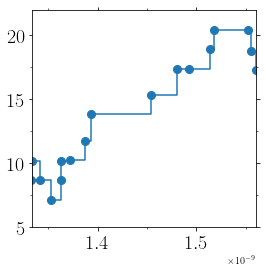

<AxesSubplot:>

In [255]:
# tt=lmpData.headers.Time.iloc[0::2]
# utl.PltErr(tt,msd.xv[:,0][0::2],
#             xlim=(tt[100],tt[130]),
#             ylim=(5,22),
#            attrs={'marker':'o',
#                   'markersize':8,
#                   'drawstyle':'steps-post'}
#           )

# # utl.PltErr(tt,msd.xv[:,1][0::2],
# # #            xlim=(tt[100],tt[130]),
# # #            ylim=(5,25),
# #            attrs={'marker':'o',
# #                   'markersize':8,
# #                   'drawstyle':'steps-post'}
# #           )

# # utl.PltErr(tt,msd.xv[:,2][0::2],
# # #            xlim=(tt[100],tt[130]),
# # #            ylim=(5,25),
# #            attrs={'marker':'o',
# #                   'markersize':8,
# #                   'drawstyle':'steps-post'}
# #           )

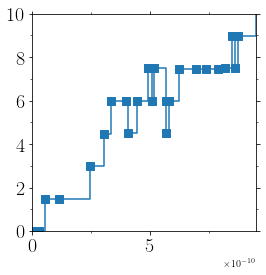

<AxesSubplot:>

In [241]:
# tt=lmpData.headers.Time.iloc[0::2]
# utl.PltErr(tt,msd.xv[:,0][0::2],
#             xlim=(tt[0],tt[50]),
#             ylim=(0,10),
#            attrs={'marker':'s',
#                   'markersize':8,
#                   'drawstyle':'steps-post'}
#           )

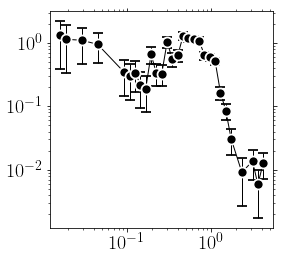

<AxesSubplot:>

In [51]:
# data = np.loadtxt('xxbarriers.txt')[:,1]

# hist, bin_edges, err = utl.GetPDF(data,n_per_decade=16)
# symbols=utl.Symbols()
# #--- plot
# utl.PltErr(bin_edges,hist,
#               yerr=err,
#        attrs=symbols.GetAttrs(),
#            xscale='log',
#            yscale='log'
#               )
            
            

In [178]:
lmpData.headers #.Time.iloc[0::2]

,Barrier,Energy,Step,Time
0,0.000,-60079.887,0.0,0.000000e+00
1,0.987,-60078.900,0.5,2.948000e-11
2,0.000,-60079.887,1.0,2.948000e-11
3,0.987,-60078.900,1.5,5.514000e-11
4,0.000,-60079.887,2.0,5.514000e-11
...,...,...,...,...
196,0.000,-60079.887,98.0,2.080000e-09
197,0.987,-60078.900,98.5,2.080000e-09
198,0.000,-60079.887,99.0,2.080000e-09
199,0.987,-60078.900,99.5,2.083000e-09


In [34]:
lmpData.coord_atoms_broken.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201])

mkdir: png: File exists


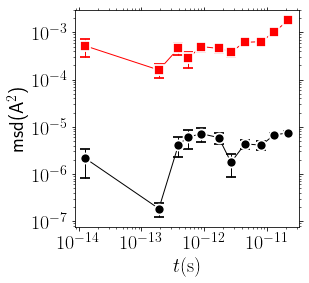

<AxesSubplot:xlabel='$t\\mathrm{(s)}$', ylabel='msd(A$^2$)'>

In [21]:
!mkdir png
symbols=utl.Symbols()

# ans=ans_tot
ax=utl.PltErr(ans_logAveraged[:,0],ans_logAveraged[:,1],
           yerr=ans_logAveraged[:,2],
           attrs=symbols.GetAttrs(count=0),
           Plot=False,
          )

ax=utl.PltErr(ans[:,0],ans[:,1],
           yerr=ans[:,2],
           ax = ax,
           attrs=symbols.GetAttrs(count=1),
           Plot=False,
          )
utl.PltErr(None,#lmpData.times[1:],
           None, #msd.Get()[1:],
          xscale='log',
          yscale='log',
           attrs={'fmt':'-'},
           ax=ax,
#           ylim=(1e-4,1e-1),
           xstr=r'$t\mathrm{(s)}$',
           ystr=r'msd(A$^2$)',
           title='png/msd.png'
          )

## arrhenius law

mkdir: png: File exists
ensemble average


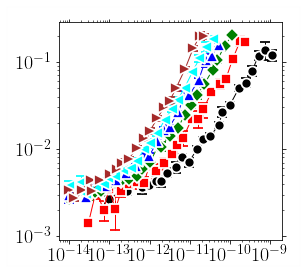

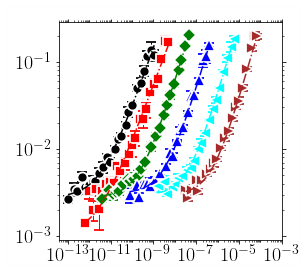

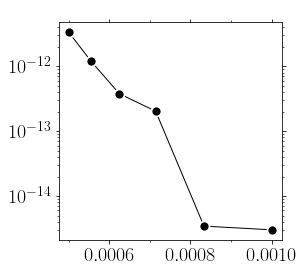

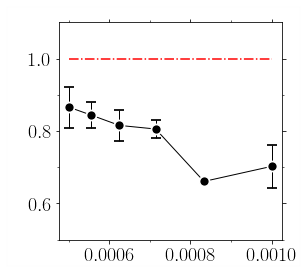

In [7]:
class Temperature:
    
    def __init__(self,temp_range,nrun,verbose=False):
        self.temps =  temp_range
        self.nrun = nrun
        t,r=np.meshgrid(self.temps,np.arange(nrun),indexing='ij')
        self.temps_runs = np.array(list(zip(t.flatten(),r.flatten())))
        self.verbose = verbose
        
    def Parse(self,dirs):
#         print('dirs:',dirs)
        self.data=list(map(lambda x:np.loadtxt(x,ndmin=2),dirs))
        if self.verbose:
            list(map(lambda x:print('Parsing: data.shape is',x.shape),self.data))
#        print('np.array(self.data):',np.array(self.data))

        
    def Plot(self,**kwargs):
#        print(list(self.temps_runs))
        self.ax = utl.PltErr(None,#ans[:,0],
                        None,#1e8*ans[:,0],
                        attrs={'fmt':'-.r'},Plot=False)

        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=kwargs['bbox_to_anchor'] if 'bbox_to_anchor' in kwargs
                    else (1.0,0.5,0.5,0.5)
                   )
        for data, temp_run, count in zip(self.data,self.temps_runs,range(len(self.data))): 
            temp = temp_run[0]
            try:
                utl.PltErr(data[:,0],data[:,1],
                       yerr=data[:,2],
                       ax = self.ax,
                       attrs=symbols.GetAttrs(count=count%7,label=r'$%s$'%temp),
                       Plot=False,
                      )
            except:
                continue
        #
        utl.PltErr(None,
                   None,
                   ax=self.ax,
                   Plot=False,
                   DrawFrame=DRAW_FRAME,
                legend=legends.Get(),
                   **kwargs
                  )
        
    def EnsAverage(self,log_scale=False):
        kount = 0
        self.data_averaged = {} #np.zeros(len(self.temps))
        for temp, indx in zip(self.temps,range(len(self.temps))):
            #--- concat. data for each temp
            data = self.data[kount:kount+self.nrun]
            if self.verbose:
                print('data.shape:',np.array(data).shape)
#             print('np.array(data):',np.array(data))
#             pdb.set_trace()
    
            filtr = list(map(lambda x:x.shape[0] > 0,data)) #--- filter empty arrays
    
            data = np.concatenate(np.array(data)[filtr]) #,axis=0)
            self.data_averaged[ temp ] = self.hist(data,log_scale)
            kount += self.nrun

    def hist(self,data,log_scale):
        n_thresh = 1
            #--- average
        xdata = data[:,0]
        ydata = data[:,1]
        xmin = np.floor(np.log10(xdata).min())
        xmax = np.ceil(np.log10(xdata).max())
        n_decades = int((xmax - xmin))
        bins = np.logspace(xmin,xmax,n_decades*6)
        #
        count, _ = np.histogram(xdata,bins=bins)
        xsum, _  = np.histogram(xdata,bins=bins,weights=xdata)
        weights = ydata if not log_scale else np.log10(ydata)
        ysum, _  = np.histogram(xdata,bins=bins,weights=weights)
        ysum_sq, _  = np.histogram(xdata,bins=bins,weights=weights*weights)
        #
        xsum = xsum[count>n_thresh]
        ysum = ysum[count>n_thresh]
        ysum_sq = ysum_sq[count>n_thresh]
        count = count[count>n_thresh]
        #
        xsum /= count
        ysum /= count
        ysum_sq /= count
        std = np.sqrt((ysum_sq - ysum * ysum)/count)
        if log_scale:
            ysum = 10 ** ysum
            std = 0.5 * ysum * (1+2*std*np.log(10))
        return np.c_[xsum,ysum,std]
        
        
#            utl.PltErr(xsum,ysum,ax=self.ax)
            

    def PlotAverage(self,rescale=False,**kwargs):
#        print(list(self.temps_runs))
        self.ax = utl.PltErr(None,#ans[:,0],
                        None,#1e8*ans[:,0],
                        attrs={'fmt':'-.r'},Plot=False)

        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=kwargs['bbox_to_anchor'] if 'bbox_to_anchor' in kwargs
                    else (1.0,0.5,0.5,0.5))
        for temp, count in zip(self.temps,range(len(self.temps))): 
            data = self.data_averaged[ temp ]
            xdata = data[:,0]
            ydata = data[:,1]
            yerr = data[:,2]
            if rescale:
                ydata /= xdata
                yerr /= xdata
            utl.PltErr(xdata,ydata,
                   yerr=yerr,
                   ax = self.ax,
                   attrs=symbols.GetAttrs(count=count%7,label=r'$%s$'%temp,nevery=1),
                   Plot=False,
                  )

        utl.PltErr(None,
                   None, 
                   ax=self.ax,
                   Plot=False,
#                    legend=legends.Get(),
                   DrawFrame=DRAW_FRAME,
                   **kwargs
                  )
        
        
    def func2nd(self,x,x0,y0,c0,alpha):
        return y0+c0*(x/x0)**alpha
#     def func2nd(self,x,y0,m0):
#         return y0+m0*x

    def Fit(self,Plot=None,shift = False,SIGMA=False,plotAttrs=None,**kwargs):
        self.Diffusion = {}
        self.exponent = {}
        pref=1e-10*1e-10 #--- ang^2 to m^2
        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=plotAttrs['bbox_to_anchor'] if 'bbox_to_anchor' in plotAttrs
                    else (1.0,0.5,0.5,0.5))

        if Plot:
            ax = utl.PltErr(None,None,
                            Plot=False)
        #
        for temp, count in zip(self.temps,range(len(self.temps))): 
            smat = self.data_averaged[ temp ] if self.nrun > 1 else self.data[count]

            xdata=smat[:,0]
            ydata=smat[:,1]
            yerr = smat[:,2]
            sigma = yerr if SIGMA else None
            popt, pcov = curve_fit(self.func2nd, xdata, ydata,
                                   sigma = sigma,
                                   **kwargs
                                    )
            #--- uncertainties
            if self.verbose:
                print('Temp=%s,x0,y0,c0,alpha'%temp,list(popt),pcov)
            y0=popt[1]
            alpha=popt[3]
            err_alpha = pcov[3,3]**0.5
            c0=popt[2]
            dc = pcov[2,2]**0.5
            tau=popt[0]
            dtau=pcov[0,0]**0.5
#             self.Diffusion[temp] = [pref*c0/tau,pref*c0/tau,pref*c0/tau]
            self.Diffusion[temp] = [pref*c0/(tau)**alpha, pref*(c0+dc)/(tau-dtau)**alpha, 
                                    pref*(c0-dc)/(tau+dtau)**alpha]
            self.exponent[temp] = [alpha,alpha+err_alpha,alpha-err_alpha]
            if Plot:
                #---fit
                xdata_shift = xdata*20**count if shift else xdata
                utl.PltErr(xdata_shift,
                                (self.func2nd(xdata,*popt)),#-y0)/xdata_shift,
                                attrs={'fmt':'-.','color':symbols.colors[count%7]},
                           Plot=False,ax=ax)
                #--- points
#                temp= [1000,1200,1400,1600,1800,2000][count]
                utl.PltErr(xdata_shift,
                           (ydata),#-y0)/xdata_shift,
                           yerr=(yerr),#-y0),#/xdata_shift,
                           attrs=symbols.GetAttrs(count=count%7,label=r'$%s$'%temp,fmt='.'),
                           ax=ax,
                           Plot=False,
                          )
        if Plot:
            utl.PltErr(None,
                       None, 
                       ax=ax,
                       Plot=False,
#                      legend=legends.Get(),
                       DrawFrame=DRAW_FRAME,
                       **plotAttrs
                      )

    def PlotDiff(self,**kwargs):
        symbols=utl.Symbols()
        utl.PltErr(1.0/np.array(self.temps),
                   list(map(lambda x:self.Diffusion[x][0],self.temps)),
                   yerr=list(map(lambda x:(self.Diffusion[x][1]-self.Diffusion[x][2])/2,self.temps)),
                   attrs=symbols.GetAttrs(),
                   DrawFrame=DRAW_FRAME,
                   **kwargs
                  )

    def PlotExponent(self,**kwargs):
        symbols=utl.Symbols()
        ax=utl.PltErr([0.5e-3,1e-3],[1,1],attrs={'fmt':'-.r'},Plot=False)
        utl.PltErr(1.0/np.array(self.temps),
                   list(map(lambda x:self.exponent[x][0],self.temps)),
                   yerr=list(map(lambda x:(self.exponent[x][1]-self.exponent[x][2]),self.temps)),
                   attrs=symbols.GetAttrs(),
                   DrawFrame=DRAW_FRAME,
                   ax=ax,
                   **kwargs
                  )

if not eval(confParser['flags']['RemoteMachine']):
    !mkdir png
    #--- temp object
    temp = Temperature(
        [1000,1200,1400,1600,1800,2000],8,
#        [1000,1200,1400,1600,1800,2000],8,
#        [1000,1200,1400,1600,1800,2000],1,
#        np.arange(1000,1440,80),1,
#         verbose = True,
                     )
    #
    #--- parse data
#    temp.Parse( list(map(lambda x:'CantorNatom16KTemp%sKEnsemble8/Run%s/msd/msd.txt'%(x[0],x[1]),
    temp.Parse( list(map(lambda x:'NiCoCrNatom1KTemp%sK/Run%s/msd/msd.txt'%(x[0],x[1]),
#    temp.Parse( list(map(lambda x:'NiNatom16KTemp%sK/Run%s/msd/msd.txt'%(x[0],x[1]),
                         temp.temps_runs ))
              )
    #
    #--- plot
#     print('single realizations')
#     temp.Plot(**{
#                   'xscale':'log',
#                   'yscale':'log',
#                    'attrs':{'fmt':'-'},
# #                   'xlim':(1e-10,1e-3),
# #                   'ylim':(1e-4,1e-1),
# #                   'xstr':r'$t\mathrm{(s)}$',
# #                   'ystr':r'msd(A$^2$)',
#                    'title':'png/msd_temp_ni.png',
#         'bbox_to_anchor':(0.01,0.3,0.5,0.5)
#     })
    #
    #--- plot average
    #
    if temp.nrun > 1:
        print('ensemble average')
        temp.EnsAverage(log_scale=False)
        temp.PlotAverage(**{
                  'yscale':'log',
                  'xscale':'log',
#                   'xlim':(1e-10,1e-3),
#                   'ylim':(1e-4,1e-1),
#                     'xstr':r'$t\mathrm{(s)}$',
#                   'ystr':r'msd(A$^2$)',
                   'title':'png/msd_temp_cantor.png',
        })

    #
    #--- fit
    #
    temp.Fit(Plot=True,
             shift=True,
#             bounds=([0, 0, 0,0.999], [1e-2, 1e-3, 1,1.001]),
             p0=[2.450192558293684e-08, 0.00023822488904874157, 0.9999977703994274, 0.9991059679876155],
#            p0=[[1e-08, 1e-4, 1e2, 1.0]],
             SIGMA=True, #--- comment for ni
             plotAttrs={'yscale':'log',
                  'xscale':'log',
#                   'xlim':(4e-13,8e-4),
#                   'ylim':(1e-4,1e-1),
#                     'xstr':r'$t\mathrm{(s)}$',
#                   'ystr':r'msd(A$^2$)',
                        'ndecade_x':2,
                    'bbox_to_anchor':(-0.05,0.23,0.5,0.5),
                   'title':'png/msd_temp_nicocr_fit.png'},
            )
    
    temp.PlotDiff(**{
                  'yscale':'log',
#                   'xlim':(1e-12,1e-3),
#                   'ylim':(1e-4,1e-1),
#                   xstr=r'$1/T(K^{-1})$',
#                   ystr=r'$D(m^2/s)$',
                    'title':'png/D_temp_cantor.png',
                    }
                )

    temp.PlotExponent(**{
#                  'yscale':'log',
#                   'xlim':(1e-10,1e-3),
                   'ylim':(.5,1.1),
#                   xstr=r'$1/T(K^{-1})$',
#                   ystr=r'$D(m^2/s)$',
                    'title':'png/alpha_temp_nicocr.png',
                    }
                )
    


### per type

mkdir: cannot create directory ‘png’: File exists
ensemble average: type 1
ensemble average: type 2
ensemble average: type 3
ensemble average: type 4
ensemble average: type 5


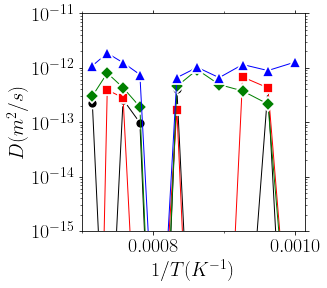

In [26]:
if not eval(confParser['flags']['RemoteMachine']):
    !mkdir png
    ax = utl.PltErr(None,None,Plot=False)
    symbols=utl.Symbols()
    legends = Legends()
    legends.Set(bbox_to_anchor=(1.0,0.5,0.5,0.5))
 
                       
    ntype = 5
    for itype in range(1,ntype+1):
        temp = Temperature(#[1000],3
                           list(map(int,np.linspace(1000,1400,11))),3
                          )
        temp.Parse( list(map(lambda x:'CantorNatom16KTemp%sK_ensemble/Run%s/msd/msd_type%s.txt'%(x[0],x[1],itype),
                            temp.temps_runs ))
                  )
        #
  #      print('single realizations')
  #      temp.Plot()
        #
        print('ensemble average: type %s'%itype)
        temp.EnsAverage()
#         temp.PlotAverage()
#         #
        temp.Fit(#Plot=True,
        #         verbose=True
        )
#         temp.PlotDiff()
        
        #--- plot
        utl.PltErr(1/np.array(list(temp.Diffusion.keys())),
                   list(map(lambda x:temp.Diffusion[x],list(temp.Diffusion.keys()))),
                       Plot=False,
                   ax=ax,
                   attrs=symbols.GetAttrs(count=(itype-1)%7,label=r'$%s$'%temp),
                 )
    utl.PltErr(None,None,
               ax=ax,
               yscale='log',
               ylim=(1e-15,1e-11),
              xstr=r'$1/T(K^{-1})$',
              ystr=r'$D(m^2/s)$',
              )

## wait times

mkdir: png: File exists


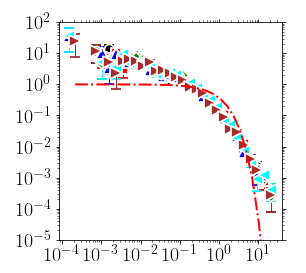

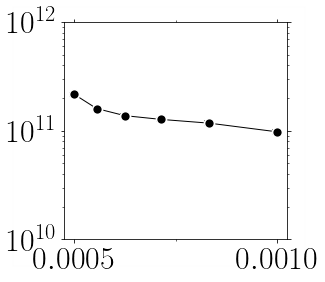

In [53]:
class Stats(Temperature):
    def __init__(self,temp_range,nrun,verbose=False):
        Temperature.__init__(self,temp_range,nrun)
        self.verbose = verbose
    #
    def PlotWaitTimes(self,scale=False,scalePowerLaw=False,
                      **kwargs):
        #
        self.ax = utl.PltErr(None,#ans[:,0],
                        None,#1e8*ans[:,0],
                        attrs={'fmt':'-.r'},Plot=False)
        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=(1.0,0.5,0.5,0.5))
        #
        self.mean_rate = {}
        #
        for temp, indx in zip(self.temps,range(len(self.temps))):
            #--- concat. data for each temp
            data = self.data[indx:indx+self.nrun]
            data = list(map(lambda x:self.GetWaitTimes(x),data))
            if self.verbose:
                print('data.shape (per temperature):',np.array(data).shape)
            data = np.concatenate(data) #,axis=0)
            rate = 1.0 / data.mean()
            self.mean_rate[temp] = [ rate, rate*(1/len(data)**0.5)]
            if scale:
                data /= data.mean() 
            if self.verbose:
                print('data.shape (concatenated):',data.shape)
            #--- histogram
            hist, bin_edges, err = utl.GetPDF(data,n_per_decade=6)
            if scalePowerLaw:
                alpha = 1.6
                hist *= bin_edges ** alpha 
                err *= bin_edges ** alpha 
            #--- plot
            utl.PltErr(bin_edges,hist,
                          yerr=err,
                   attrs=symbols.GetAttrs(count=indx%7,label=r'$%s$'%temp,fmt='.'),
                   ax = self.ax,
                   Plot=False,
                          )
        #
        xhi=self.ax.axis()[1]
        xarr = np.logspace(np.log10(xhi)-5.0,np.log10(xhi),32)
        utl.PltErr( xarr if scale else None,
                   np.exp(-xarr) if scale else None,
                   attrs={'fmt':'-.r','lw':2},
                   ax=self.ax,
                   Plot=False,
                   
#                    legend=legends.Get(),
                   DrawFrame=DRAW_FRAME,
                   **kwargs
                  )
            
    def PlotAverageRate(self,**kwargs):
#        print(list(self.temps_runs))
#         self.ax = utl.PltErr(None,#ans[:,0],
#                         None,#1e8*ans[:,0],
#                         attrs={'fmt':'-.r'},Plot=False)

        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=(1.0,0.5,0.5,0.5))
        data = list(map(lambda x:self.mean_rate[ x ][0], self.temps))
        err = list(map(lambda x:self.mean_rate[ x ][1], self.temps))
#             utl.PltErr(data[:,0],data[:,1],
#                    yerr=data[:,2],
#                    ax = self.ax,
#                    attrs=symbols.GetAttrs(count=count%7,label=r'$%s$'%temp),
#                    Plot=False,
#                   )

        utl.PltErr(1.0/np.array(self.temps),
                   data,
                   yerr=err,
                   attrs=symbols.GetAttrs(),
                   DrawFrame=DRAW_FRAME,
                   **kwargs
                  )
            
    
    def GetWaitTimes(self,times):
#         times = np.array(np.c_[self.lmpData.headers['Time'].iloc[0::2]].flatten())
        dtt = times[1:]-times[:-1]
        assert not np.any(dtt<0.0)
        filtr = dtt > 0.0
        return dtt[filtr]

    #
    def Barries(self):
        Barrier = self.lmpData.headers['Barrier'].iloc[1::2]        
        hist, bin_edges, err = utl.GetPDF(Barrier,linscale=True,n_per_decade=16)
        utl.PltErr(bin_edges,hist,
                  yerr=err,
                   attrs=symbols.GetAttrs(),
                   #yscale='log',
                   #xscale='log',
                   xstr=r'$\Delta E$',
                   ystr=r'$P(\Delta E)$'
                  )

if not eval(confParser['flags']['RemoteMachine']):
    !mkdir png
    
    stats = Stats(
#        [1000,1200,1400,1600,1800,2000],6,
        [1000,1200,1400,1600,1800,2000],8,
#        [1000,1200,1400,1600,1800,2000],1,
#        np.arange(1000,1440,80),1,
        verbose=False
                     )
#    stats.Parse( list(map(lambda x:'CantorNatom16KTemp%sKEnsemble8/Run%s/msd/event_times.txt'%(x[0],x[1]),
    stats.Parse( list(map(lambda x:'NiCoCrNatom1KTemp%sK/Run%s/msd/event_times.txt'%(x[0],x[1]),
#    stats.Parse( list(map(lambda x:'NiNatom16KTemp%sK/Run%s/msd/event_times.txt'%(x[0],x[1]),
                         stats.temps_runs ))
               )
    stats.PlotWaitTimes(scale=True,
                        **{'xscale':'log',
                  'yscale':'log',
#                   'xlim':(1e-9,1e-3),
                   'ylim':(1e-5,1e2), #(1e-5,1e2),
#                           'xstr':r'$\Delta t$',
#                           'ystr':r'$P(\Delta t)$',
                   'title':'png/waitTimes_unscaled_nicocr.png'},

                       )
#     stats.PlotWaitTimes(scale=True,scalePowerLaw=True,
#                         **{'xscale':'log',
#                   'yscale':'log',
# #                   'xlim':(1e-9,1e-3),
#                    'ylim':(1e-5,1e0), #(1e-5,1e2),
# #                           'xstr':r'$\Delta t$',
# #                           'ystr':r'$P(\Delta t)$',
#                    'title':'png/waitTimes_rescaled_ni.png'},
#                       )
    stats.PlotAverageRate(
                **{
                    'fontsize':32,
#                  'xscale':'log',
                  'yscale':'log',
#                   'xlim':(1e-9,1e-3),
                   'ylim':(1e10,1e12), #(1e-5,1e2),
#                           'xstr':r'$1/T$',
#                           'ystr':r'$\lambda$',
                   'title':'png/eventRate_nicocr.png'},
    
    )
    #stats.Barries()

## jumps

mkdir: png: File exists


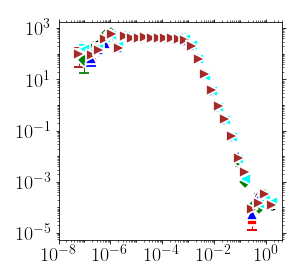

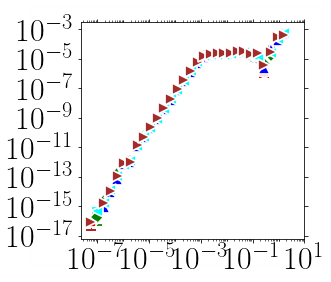

In [56]:
class JumpStats(Temperature):
    def __init__(self,temp_range,nrun,verbose=False):
        Temperature.__init__(self,temp_range,nrun)
        self.verbose = verbose
    #
    def PlotPdf(self,scale=False,**kwargs):
        #
        self.ax = utl.PltErr(None,#ans[:,0],
                        None,#1e8*ans[:,0],
                        attrs={'fmt':'-.r'},Plot=False)
        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=kwargs['bbox_to_anchor'] if 'bbox_to_anchor' in kwargs
                    else (1.0,0.5,0.5,0.5))
        #
        self.mean_rate = {}
        #
        for temp, indx in zip(self.temps,range(len(self.temps))):
            #--- concat. data for each temp
            data = self.data[indx:indx+self.nrun][0]
            if self.verbose:
                print('data.shape (per temperature):',np.array(data).shape)
            if self.verbose:
                print('data.shape (concatenated):',data.shape)
            #--- histogram
#            data = np.array(data).flatten()
            hist = data[:,1]
            bin_edges = data[:,0]
            err = data[:,2]
            
            #--- remove count == 1
            filtr = err == hist
            hist = hist[~filtr]
            bin_edges = bin_edges[~filtr]
            err = err[~filtr]
            if scale:
                alpha = 2.5 #2.8 #2.4
                hist *= bin_edges ** alpha
                err  *= bin_edges ** alpha
        #--- plot
#            temp= [1000,1200,1400,1600,1800,2000][indx]
            utl.PltErr(bin_edges,hist,
                          yerr=err,
                   attrs=symbols.GetAttrs(count=indx%7,label=r'$%s$'%temp,fmt='.'),
                   ax = self.ax,
                   Plot=False,
                          )
        #
        utl.PltErr(None,
                   None,
                   ax=self.ax,
                   Plot=False,
#                     legend=legends.Get(),
                   DrawFrame=DRAW_FRAME,
                   **kwargs
                  )
            

if not eval(confParser['flags']['RemoteMachine']):
    !mkdir png
    
    stats = JumpStats(
#        [1000,1200,1400,1600,1800,2000],
        [1000,1200,1400,1600,1800,2000],
#        np.arange(1000,1440,80),
        1,
#        verbose=True
                     )
#    stats.Parse( list(map(lambda x:'CantorNatom16KTemp%sKEnsemble8/Run%s/msd/event_jumps.txt'%(x[0],x[1]),
    stats.Parse( list(map(lambda x:'NiCoCrNatom1KTemp%sK/Run%s/msd/event_jumps.txt'%(x[0],x[1]),
#    stats.Parse( list(map(lambda x:'NiNatom16KTemp%sK/Run%s/msd/event_jumps.txt'%(x[0],x[1]),
                         stats.temps_runs ))
               )
    stats.PlotPdf(scale=False,
                        **{'xscale':'log',
                  'yscale':'log',
                   'xlim':(1e-8,4e0),
#                   'ylim':(1e-3,1e1), #(1e-5,1e2),
#                           'xstr':r'$\Delta t$',
#                           'ystr':r'$P(\Delta t)$',
                        'ndecade_x':2,'ndecade_y':2,
                    'bbox_to_anchor':(0.56,0.27,0.5,0.5),
                   'title':'png/jumpsPdf_nicocr.png'},

                       )
    
    stats.PlotPdf(scale=True,
                **{'xscale':'log',
                  'yscale':'log',
                   'fontsize':32,
#                   'xlim':(1e-8,2e0),
#                   'ylim':(1e-3,1e1), #(1e-5,1e2),
#                           'xstr':r'$\Delta t$',
#                           'ystr':r'$P(\Delta t)$',
                        'ndecade_x':2,'ndecade_y':2,
                   'title':'png/jumpsPdf_rescaled_nicocr.png'},

                       )

In [7]:
Energy = lmpData.headers['Energy']

## energy

### sampled energies

mkdir: png: File exists


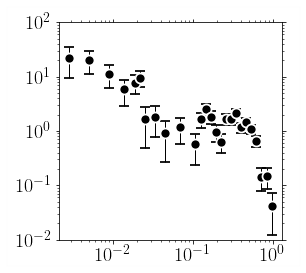

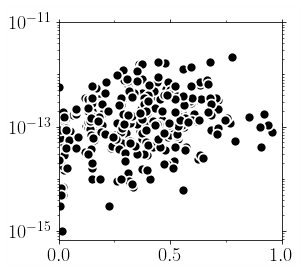

In [51]:
class EnergyStats(Temperature):
    def __init__(self,temp_range,nrun,verbose=False):
        Temperature.__init__(self,temp_range,nrun)
        self.verbose = verbose
    #
    def GetWaitTimes(self,times):
        times = times[0::2]
        dtt = times[1:]-times[:-1]
        assert not np.any(dtt<0.0)
#        filtr = dtt > 0.0
        return dtt#[filtr]
    #
    def PlotPdf(self,column_energy = 0,**kwargs):
        #
        self.ax = utl.PltErr(None,#ans[:,0],
                        None,#1e8*ans[:,0],
                        attrs={'fmt':'-.r'},Plot=False)
        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=(1.0,0.5,0.5,0.5))
        #
        self.mean_rate = {}
        #
        for temp, indx in zip(self.temps,range(len(self.temps))):
            #--- concat. data for each temp            
            data = np.concatenate(list(map(lambda x: self.data[x][:,column_energy],range(indx,indx+self.nrun))))
            #--- remove zeros
            data = data[data > 0.0]
            if self.verbose:
                print('data.shape (per temperature):',np.array(data).shape)
            if self.verbose:
                print('data.shape (concatenated):',data.shape)
            #--- histogram
#            data = np.array(data).flatten()
            #--- histogram
            hist, bin_edges, err = utl.GetPDF(data,n_per_decade=16)
        
            #--- filtr
            filtr = hist == err
            hist = hist[~filtr]
            bin_edges = bin_edges[~filtr]
            err = err[~filtr]
        #--- plot
            utl.PltErr(bin_edges,hist,
                          yerr=err,
                   attrs=symbols.GetAttrs(count=indx%7,label=r'$%s$'%temp,fmt='.'),
                   ax = self.ax,
                   Plot=False,
                          )
        #
        utl.PltErr(None,
                   None,
                   ax=self.ax,
                   Plot=False,
                   
#                    legend=legends.Get(),
                   DrawFrame=DRAW_FRAME,
                   **kwargs
                  )
        
    def PlotPdfConcat(self,scale=False,
                      column_energy = 0,
                      type_column=0,
                      splitByType=True,
                      n_per_decade = 8,
                      **kwargs):
        #
        self.ax = utl.PltErr(None,#ans[:,0],
                        None,#1e8*ans[:,0],
                        attrs={'fmt':'-.r'},Plot=False)
        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=(1.0,0.5,0.5,0.5))
        #
        self.mean_rate = {}
        #
        for temp, indx in zip(self.temps,range(len(self.temps))):
            #--- concat. data for each temp            
#            data = np.concatenate(list(map(lambda x: self.data[x][:,column_energy],range(indx,indx+self.nrun))))
            data = np.concatenate(list(map(lambda x: self.data[x],range(indx,indx+self.nrun))))
#             types = np.concatenate(list(map(lambda x: self.data[x][:,type_column],range(indx,indx+self.nrun))))
            #--- remove zeros
#            data = data[data > 0.0]
            if self.verbose:
                print('data.shape (per temperature):',np.array(data).shape)
            if self.verbose:
                print('data.shape (concatenated):',data.shape)
            #--- histogram
#            data = np.array(data).flatten()
            #--- histogram
            data_concat = data.copy() if indx ==0 else np.concatenate([data_concat,data]) #np.c_[types,data] if indx ==0 else\
                        #np.concatenate([data_concat,np.c_[types,data]])
        if self.verbose:
            print('type.shape (concatenated):',data_concat.shape)
        
        #--- split by type
        if splitByType:
            df=pd.DataFrame(np.c_[data_concat[:,type_column],data_concat[:,column_energy]],
                            columns=['type','dE'])
            types=df.groupby(by='type').groups
            for itype in types:
                indices = types[itype]
                elist = np.array(df['dE'].iloc[indices])
                if self.verbose:
                    print('elist.shape:',elist.shape)

                #--- histogram
                hist, bin_edges, err = utl.GetPDF(elist,n_per_decade=n_per_decade)

                #--- filtr
                filtr = hist == err
                hist = hist[~filtr]
                bin_edges = bin_edges[~filtr]
                err = err[~filtr]
                #--- plot
                if scale:
                    hist *= 100**int(itype)
                    err *= 100**int(itype)
                utl.PltErr(bin_edges,hist,
                              yerr=err,
                       attrs=symbols.GetAttrs(count=int(itype-1)%7,label=r'$%s$'%itype),#,fmt='.'),
                       ax = self.ax,
                       Plot=False,
                              )
        else:
                #--- histogram
                hist, bin_edges, err = utl.GetPDF(data_concat[:,column_energy],n_per_decade=n_per_decade)

                #--- filtr
                filtr = hist == err
                hist = hist[~filtr]
                bin_edges = bin_edges[~filtr]
                err = err[~filtr]
                #--- plot
#                 if scale:
#                     hist *= 100**int(itype)
#                     err *= 100**int(itype)
                utl.PltErr(bin_edges,hist,
                              yerr=err,
                       attrs=symbols.GetAttrs(count=0),#,label=r'$%s$'%itype),#,fmt='.'),
                       ax = self.ax,
                       Plot=False,
                              )
        #
        utl.PltErr(None,
                   None,
                   ax=self.ax,
                   Plot=False,

    #                    legend=legends.Get(),
                   DrawFrame=DRAW_FRAME,
                   **kwargs
                  )

    def Scatter(self,nevery=1,**kwargs):
        self.ax = utl.PltErr(None,#ans[:,0],
                        None,#1e8*ans[:,0],
                        attrs={'fmt':'-.r'},Plot=False)
        symbols=utl.Symbols()
        legends = Legends()
        legends.Set(bbox_to_anchor=(1.0,0.5,0.5,0.5))

        #
        column_energy = 0
        column_time = 3
        for indx in range(0,len(self.temps),nevery):
            temp = self.temps[indx]
            #--- concat. data for each temp            
            data_energy = np.concatenate(list(map(lambda x: self.GetEnergy(self.data[x][:,column_energy]),
                                                  range(indx,indx+self.nrun))))
            #--- wait_times
            data = self.data[indx:indx+self.nrun]
            data_waitTimes = np.concatenate(list(map(lambda x: self.GetWaitTimes(self.data[x][:,column_time]),
                                                     range(indx,indx+self.nrun))))

            if self.verbose:
                print('data_energy.shape (per temperature):',np.array(data_energy).shape)
                print('data_waitTimes.shape (per temperature):',np.array(data_waitTimes).shape)
            #--- plot scatter
            scale = 100 ** indx
            filtr = data_waitTimes > 0
            utl.PltErr(data_energy[filtr],scale*data_waitTimes[filtr],
                        attrs=symbols.GetAttrs(count=indx%7,label=r'$%s$'%temp,fmt='.'),
                        ax = self.ax,
                        Plot=False,
                        )
            #--- plot average
#             nbins = 8
#             count, _=np.histogram(data_energy[filtr],bins=nbins)
#             xsum, _=np.histogram(data_energy[filtr],weights=data_energy[filtr],bins=nbins)
#             ysum, _=np.histogram(data_energy[filtr],weights=data_waitTimes[filtr],bins=nbins)
#             ysum /= count
# #            ysum =10 ** ysum 
#             xsum /= count
#             #---
#             utl.PltErr(xsum,ysum,
#                         attrs=symbols.GetAttrs(count=(indx)%7,label=r'$%s$'%temp,fmt='.'),
#                         ax = self.ax,
#                         Plot=False,
#                         )
        
        
        utl.PltErr(None,
                   None,
                   ax=self.ax,
                   Plot=False,
#                    legend=legends.Get(),
                   DrawFrame=DRAW_FRAME,
                   **kwargs
                  )

    def GetEnergy(self,slist):
        n=len(slist)
        return slist[1:n:2]
            
if not eval(confParser['flags']['RemoteMachine']):
    !mkdir png
    
    stats = EnergyStats(
#        [1000,1200,1400,1600,1800,2000],8,
        [2000],8,#[1000,1200,1400,1600,1800,2000],8,
#        [1000,1400,1800],8,
#        np.arange(1000,1440,40),1,
#        verbose=True
                     )
    stats.Parse( list(map(lambda x:'CantorNatom16KTemp%sKEnsemble8/Run%s/msd/timeseries.txt'%(x[0],x[1]),
#    stats.Parse( list(map(lambda x:'NiCoCrNatom1KTemp%sK/Run%s/msd/timeseries.txt'%(x[0],x[1]),
#    stats.Parse( list(map(lambda x:'NiNatom16KTemp%sK/Run%s/msd/timeseries.txt'%(x[0],x[1]),
                         stats.temps_runs ))
               )
    stats.PlotPdf(scale=False,
                        **{'xscale':'log',
                  'yscale':'log',
#                   'xlim':(1e-3,1e0),
                   'ylim':(1e-2,1e2), #(1e-5,1e2),
#                           'xstr':r'$\Delta t$',
#                           'ystr':r'$P(\Delta t)$',
#                        'ndecade_x':2,'ndecade_y':2,
                   'title':'png/BarrierPdf_cantor.png'},

                       )
    stats.Scatter(nevery=2,                        
                **{'xscale':'linear',
                  'yscale':'log',
                   'xlim':(0,1),
#                   'ylim':(1e-3,1e1), #(1e-5,1e2),
#                           'xstr':r'$\Delta t$',
#                           'ystr':r'$P(\Delta t)$',
                        'ndecade_y':2,
                   'title':'png/twVsEnergy_cantor.png',
                  }
)

### Events dir

mkdir: png: File exists
Parsing: data.shape is (362, 4)
Parsing: data.shape is (824, 4)
Parsing: data.shape is (600, 4)
Parsing: data.shape is (985, 4)
Parsing: data.shape is (572, 4)
Parsing: data.shape is (753, 4)
Parsing: data.shape is (601, 4)
Parsing: data.shape is (744, 4)
Parsing: data.shape is (308, 4)
Parsing: data.shape is (667, 4)
Parsing: data.shape is (792, 4)
Parsing: data.shape is (329, 4)
Parsing: data.shape is (668, 4)
Parsing: data.shape is (740, 4)
Parsing: data.shape is (261, 4)
Parsing: data.shape is (558, 4)
Parsing: data.shape is (789, 4)
Parsing: data.shape is (873, 4)
Parsing: data.shape is (739, 4)
Parsing: data.shape is (901, 4)
Parsing: data.shape is (868, 4)
Parsing: data.shape is (878, 4)
Parsing: data.shape is (1048, 4)
Parsing: data.shape is (359, 4)
Parsing: data.shape is (1109, 4)
Parsing: data.shape is (520, 4)
Parsing: data.shape is (493, 4)
Parsing: data.shape is (373, 4)
Parsing: data.shape is (195, 4)
Parsing: data.shape is (472, 4)
Parsing: data.

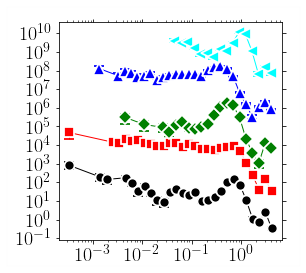

In [53]:
if not eval(confParser['flags']['RemoteMachine']):
    !mkdir png
    
    stats = EnergyStats(
        [1000,1200,1400,1600,1800,2000],8,
        verbose=True
                     )
    stats.Parse( list(map(lambda x:'CantorNatom16KTemp%sKEnsemble8/Run%s/msd/eventID_barrier.txt'%(x[0],x[1]),
#    stats.Parse( list(map(lambda x:'NiCoCrNatom1KTemp%sK/Run%s/msd/timeseries.txt'%(x[0],x[1]),
#    stats.Parse( list(map(lambda x:'NiNatom16KTemp%sK/Run%s/msd/timeseries.txt'%(x[0],x[1]),
                         stats.temps_runs ))
               )
#     stats.PlotPdf(column_energy=3,
#                         **{'xscale':'log',
#                   'yscale':'log',
# #                   'xlim':(1e-3,1e0),
# #                   'ylim':(1e-3,1e2), #(1e-5,1e2),
# #                           'xstr':r'$\Delta t$',
# #                           'ystr':r'$P(\Delta t)$',
# #                        'ndecade_x':2,'ndecade_y':2,
#                    'title':'png/BarrierPdf_cantor.png'},

#                        )

    stats.PlotPdfConcat(scale=True, 
                        column_energy=3,
                        splitByType = True,
                        n_per_decade=8,
                        **{'xscale':'log',
                  'yscale':'log',
#                   'xlim':(1e-3,1e0),
#                   'ylim':(1e-3,1e2), #(1e-5,1e2),
#                           'xstr':r'$\Delta t$',
#                           'ystr':r'$P(\Delta t)$',
#                        'ndecade_x':2,'ndecade_y':2,
#                   'title':'png/BarrierPdf_cantor.png'
                          },

                       )

    

#     stats.Scatter(nevery=2,                        
#                 **{'xscale':'linear',
#                   'yscale':'log',
#                    'xlim':(0,1),
# #                   'ylim':(1e-3,1e1), #(1e-5,1e2),
# #                           'xstr':r'$\Delta t$',
# #                           'ystr':r'$P(\Delta t)$',
#                         'ndecade_y':2,
#                    'title':'png/twVsEnergy_cantor.png',
#                   }
# )

### catalogs

mkdir: png: File exists
Parsing: data.shape is (649, 3)
Parsing: data.shape is (297, 3)
Parsing: data.shape is (811, 3)
Parsing: data.shape is (304, 3)
Parsing: data.shape is (538, 3)
Parsing: data.shape is (547, 3)
Parsing: data.shape is (268, 3)
Parsing: data.shape is (187, 3)
Parsing: data.shape is (326, 3)
Parsing: data.shape is (231, 3)
Parsing: data.shape is (585, 3)
Parsing: data.shape is (146, 3)
Parsing: data.shape is (306, 3)
Parsing: data.shape is (338, 3)
Parsing: data.shape is (156, 3)
Parsing: data.shape is (151, 3)
Parsing: data.shape is (294, 3)
Parsing: data.shape is (165, 3)
Parsing: data.shape is (320, 3)
Parsing: data.shape is (270, 3)
Parsing: data.shape is (279, 3)
Parsing: data.shape is (268, 3)
Parsing: data.shape is (270, 3)
Parsing: data.shape is (120, 3)
Parsing: data.shape is (240, 3)
Parsing: data.shape is (109, 3)
Parsing: data.shape is (141, 3)
Parsing: data.shape is (70, 3)
Parsing: data.shape is (13, 3)
Parsing: data.shape is (84, 3)
Parsing: data.shape

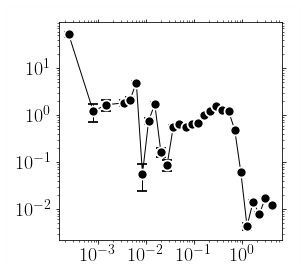

In [59]:
if not eval(confParser['flags']['RemoteMachine']):
    !mkdir png
    
    stats = EnergyStats(
        [1000,1200,1400,1600,1800,2000],8,
        verbose=True
                     )
    stats.Parse( list(map(lambda x:'CantorNatom16KTemp%sKEnsemble8/Run%s/msd/eventID_barrier_catalog_type5.txt'%(x[0],x[1]),
#    stats.Parse( list(map(lambda x:'NiCoCrNatom1KTemp%sK/Run%s/msd/timeseries.txt'%(x[0],x[1]),
#    stats.Parse( list(map(lambda x:'NiNatom16KTemp%sK/Run%s/msd/timeseries.txt'%(x[0],x[1]),
                         stats.temps_runs ))
               )

    stats.PlotPdfConcat( 
                        column_energy=2,
                        splitByType = False,
                        n_per_decade = 8,
                        **{'xscale':'log',
                  'yscale':'log',
#                   'xlim':(1e-3,1e0),
#                   'ylim':(1e-3,1e2), #(1e-5,1e2),
#                           'xstr':r'$\Delta t$',
#                           'ystr':r'$P(\Delta t)$',
#                        'ndecade_x':2,'ndecade_y':2,
#                   'title':'png/BarrierPdf_cantor.png'
                          },

                       )

    

#     stats.Scatter(nevery=2,                        
#                 **{'xscale':'linear',
#                   'yscale':'log',
#                    'xlim':(0,1),
# #                   'ylim':(1e-3,1e1), #(1e-5,1e2),
# #                           'xstr':r'$\Delta t$',
# #                           'ystr':r'$P(\Delta t)$',
#                         'ndecade_y':2,
#                    'title':'png/twVsEnergy_cantor.png',
#                   }
# )

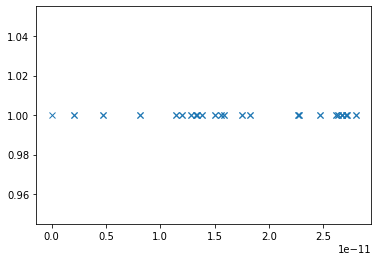

In [11]:
times=lmpData.headers['Time']
plt.plot(times,np.ones(len(times)),'x')

In [26]:
tt=np.array(times.iloc[0:-1:2])
dt=tt[1:]-tt[:-1]

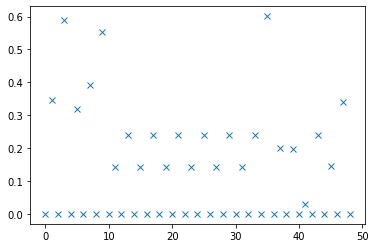

In [27]:
Barrier=lmpData.headers['Barrier']

plt.plot(Barrier,'x')

In [28]:
barrier.shape

(24,)

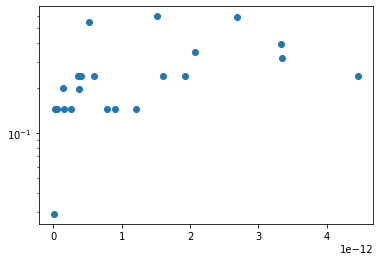

In [33]:
barrier = np.array(Barrier.iloc[1:-1:2])
plt.scatter(dt,barrier[:-1])
plt.yscale('log')

In [34]:
dt

array([2.070e-12, 2.685e-12, 3.344e-12, 3.331e-12, 5.300e-13, 9.000e-13,
       4.000e-13, 1.600e-13, 3.900e-13, 1.210e-12, 6.000e-13, 2.600e-13,
       1.610e-12, 7.800e-13, 4.460e-12, 2.000e-14, 1.930e-12, 1.520e-12,
       1.500e-13, 3.800e-13, 1.000e-14, 3.600e-13, 6.000e-14])

In [35]:
barrier

array([0.347, 0.59 , 0.318, 0.393, 0.552, 0.144, 0.24 , 0.144, 0.24 ,
       0.144, 0.24 , 0.144, 0.24 , 0.144, 0.24 , 0.144, 0.24 , 0.601,
       0.199, 0.196, 0.029, 0.241, 0.146, 0.34 ])

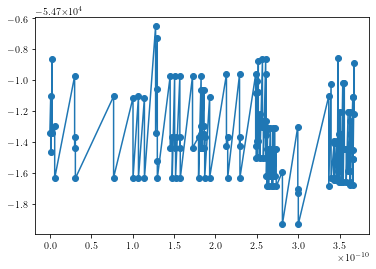

In [95]:
plt.plot(lmpData.headers['Time'],Energy,'-o')